In [350]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import math
import copy
import sys
sys.path.insert(1, "../")

import numpy as np
import gym
import gym_keygrid
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import grakel
import sknetwork
import networkx as nx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [351]:
from rl_research.utils import trajectory2graph, plot_trajectory, plot_scores

### Generate Trajectories

In [6]:
env = gym.make('keygrid-v0', grid_length=20)

You are using the KeyGridSparse environment with length 20


In [471]:
num_ep = 10
render = False
labels = {s:i for i, s in enumerate(env.states)}
trajectories = []
graphs = []

for n in range(num_ep):
    state = env.reset()
    rewards, actions, states = [], [], []
    score = 0
    t = 0
    done = False
    
    G = nx.DiGraph()
    G.add_node(state)
    G.nodes[state]['label'] = ''.join(map(str, state))

    while not done and t < env._max_episode_steps:        
        action = env.sample_action()
        
        states.append(state)
        actions.append(action)

        state, reward, done, _ = env.step(action)
    
        if state not in states:
            G.add_node(state)
            G.nodes[state]['label'] = ''.join(map(str, state))
            G.add_edge(states[-1], state)
    
        score += reward
                
        if render:
            env.render()

        t += 1
    
    states.append(state)

    graph_info = list(grakel.graph_from_networkx(
        [G], node_labels_tag='label'))[0]
    print(graph_info)
    graph = grakel.Graph(graph_info[0], node_labels=graph_info[1])

    graphs.append(graph)
    trajectories.append(states)

[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(6, 1): 1.0}, (6, 1): {(7, 1): 1.0, (5, 1): 1.0}, (7, 1): {}, (5, 1): {}}, {(0, 0): '00', (1, 0): '10', (2, 0): '20', (3, 0): '30', (4, 0): '40', (5, 0): '50', (6, 0): '60', (6, 1): '61', (7, 1): '71', (5, 1): '51'}, None]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {}}, {(0, 0): '00', (1, 0): '10', (2, 0): '20', (3, 0): '30', (4, 0): '40', (5, 0): '50', (6, 0): '60'}, None]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {}}, {(0, 0): '00', (1, 0): '10', (2, 0): '20', (3, 0): '30', (4, 0): '40'}, None]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {}}, {(0, 0): '00', (1, 0): '10', (2, 0): '20', (3, 0): '30'}, None]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2

In [472]:
# kernel = grakel.WeisfeilerLehman(normalize=True, base_graph_kernel=grakel.ShortestPath)

In [488]:
kernel = grakel.ShortestPath(normalize=True, with_labels=True)

In [500]:
kernel.fit([graphs[0]])

ShortestPath(normalize=True)

In [501]:
kernel.transform(graphs)

ValueError: shapes (10,21) and (44,1) not aligned: 21 (dim 1) != 44 (dim 0)

/Users/utilisateur/opt/anaconda3/lib/python3.7/site-packages/grakel/graph.py:382: UserWarning: overriding existingnode labels for indexes
  warnings.warn('overriding existing' +


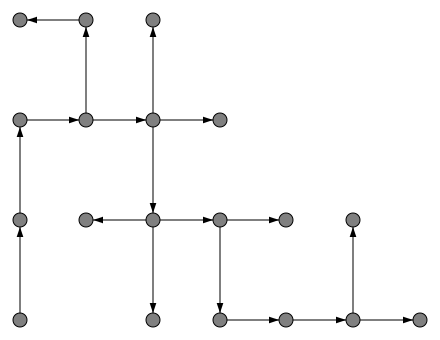

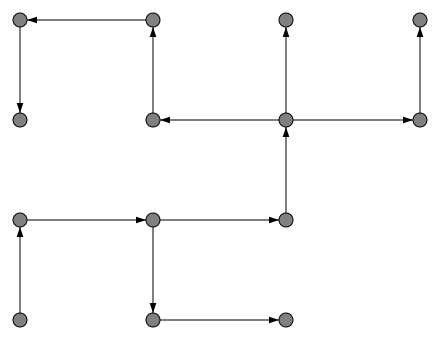

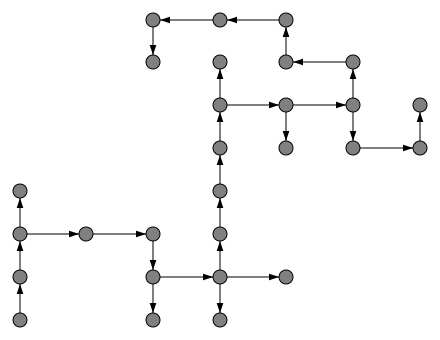

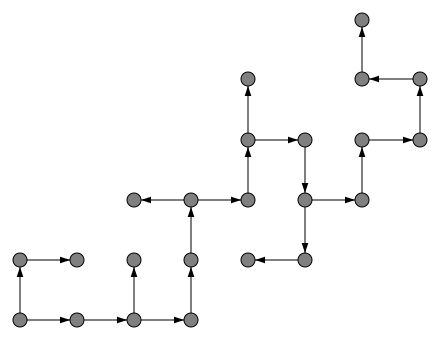

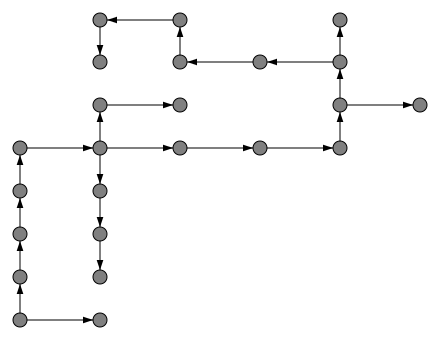

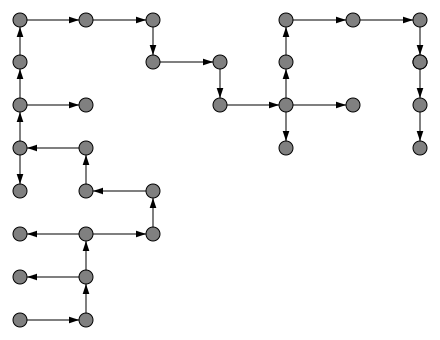

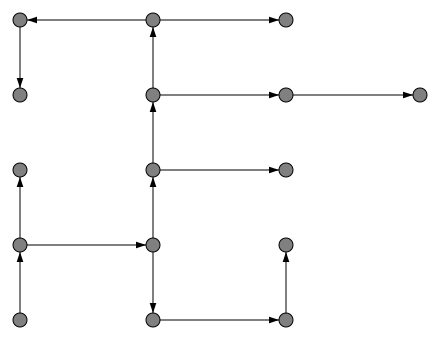

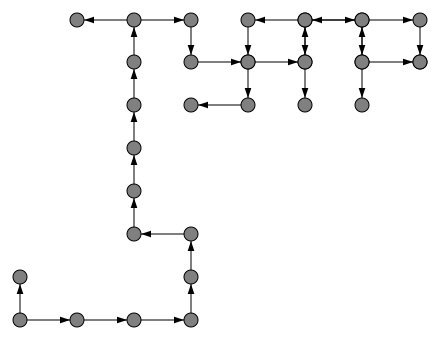

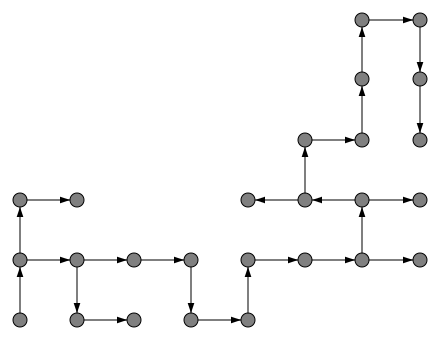

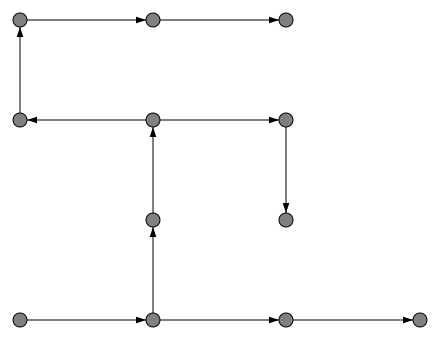

In [451]:
for g in graphs:
    display(plot_trajectory(g))

In [22]:
wl_kernel = grakel.WeisfeilerLehman(normalize=True, base_graph_kernel=grakel.Propagation())

In [90]:
states = trajectories[-1]
graph = graphs[-1]
new_graph = trajectory2graph(states)
display(new_graph.edge_dictionary == graph.edge_dictionary)

(0, 0) (1, 0)
(1, 0) (2, 0)


False

In [648]:
num_ep = 5
render = False
labels = {s:i for i, s in enumerate(env.states)}
graphs = []

for n in range(num_ep):
    state = env.reset()
    rewards, actions, states = [], [], []
    score = 0
    t = 0
    done = False
    
    G = nx.Graph()
    G.add_node(state)
    G.nodes[state]['label'] = state
    
    while not done and t < env._max_episode_steps:        
        action = env.sample_action()
        
        states.append(state)
        actions.append(action)

        state, reward, done, _ = env.step(action)
    
        rewards.append(reward)
        score += reward
        
        G.add_node(state)
        G.nodes[state]['label'] = state
        G.add_edge(states[-1], state)
        
        if render:
            env.render()

        t += 1
    graphs.append(G)
    print(states)

graphs = list(grakel.graph_from_networkx(graphs, node_labels_tag='label'))

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (2, 0), (2, 1), (1, 1), (2, 1), (1, 1), (1, 1), (1, 1), (2, 1), (2, 1)]
[(0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0)]
[(0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (1, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (1, 0)]
[(0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0)]
[(0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (2, 0), (2, 0), (1, 0), (1, 0), (2, 0), (2, 0), (2, 0), (1, 0), (2, 0), (1, 0)]


In [649]:
grak_graph = []
for g in graphs:
    grak_graph.append(grakel.Graph(g[0], node_labels=g[1]))

In [20]:
wl_kernel = grakel.WeisfeilerLehman(normalize=True, base_graph_kernel=grakel.Propagation())

In [21]:
grak_graph

NameError: name 'grak_graph' is not defined

In [670]:
idx = 2

In [673]:
grak_graph[idx].index_node_labels

{0: (0, 0), 1: (1, 0), 2: (2, 0)}

In [672]:
grak_graph[idx].convert_labels('adjacency')

In [659]:
grak_graph[idx].get_labels()

/Users/utilisateur/opt/anaconda3/lib/python3.7/site-packages/grakel/graph.py:312: UserWarning: changing format from "adjacency" to "all"
  warnings.warn('changing format from "adjacency" to "all"')


{0: (0, 0), 1: (1, 0), 2: (1, 1), 3: (2, 0), 4: (2, 1)}

In [661]:
grak_graph[idx].index_node_labels

{0: (0, 0), 1: (1, 0), 2: (1, 1), 3: (2, 0), 4: (2, 1)}

In [456]:
wl_kernel.fit_transform([grak_graph[0]]) 

array([[1.]])

In [459]:
wl_kernel.transform(grak_graph)

array([[1.        ],
       [0.15811388],
       [0.10540926],
       [0.09960238],
       [0.0745356 ],
       [0.12297746],
       [0.11952286],
       [0.14054567],
       [0.06454972],
       [0.1304373 ]])

In [ ]:
sknetwork.visualization.svg_graph()

In [ ]:
wl_kernel = grakel.WeisfeilerLehman(normalize=True)
wl_kernel.fit_transform([g1, g2])

In [191]:
g1 = Graph([('a', 'b', 1.), ('a', 'c', 1.), ('b', 'a', 1.), ('c', 'a', 1.)])

In [192]:
g2 = Graph([('d', 'e', 1.), ('d', 'f', 1.), ('e', 'd', 1.), ('f', 'd', 1.)])

In [193]:
g1.construct_labels()
g2.construct_labels()

In [694]:
env = gym.make('keygrid-v1', grid_length=10)

You are using the KeyGrid2d environment with length 10


In [702]:
from rl_research.algorithms import train
from rl_research.algorithms import agents

L = 5000
logs = True

In [703]:
agent = train(env, agents['reinforce_seq_comp'], L, logs=logs)


****************************************************************************************************
TRAINING START


Iteration:  0
(0, 0, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(0, 0, 1) probas:  [0.2  0.21 0.19 0.2  0.2 ]
(0, 1, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(0, 1, 1) probas:  [0.2  0.21 0.19 0.2  0.21]
(0, 2, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(0, 2, 1) probas:  [0.2  0.2  0.19 0.2  0.21]
(0, 3, 0) probas:  [0.2  0.2  0.21 0.2  0.2 ]
(0, 3, 1) probas:  [0.2  0.2  0.19 0.2  0.21]
(0, 4, 0) probas:  [0.2  0.19 0.21 0.2  0.2 ]
(0, 4, 1) probas:  [0.2  0.2  0.19 0.2  0.21]
(0, 5, 0) probas:  [0.2  0.19 0.21 0.2  0.19]
(0, 5, 1) probas:  [0.19 0.2  0.2  0.2  0.21]
(0, 6, 0) probas:  [0.2  0.19 0.21 0.2  0.19]
(0, 6, 1) probas:  [0.19 0.2  0.2  0.2  0.21]
(0, 7, 0) probas:  [0.2  0.19 0.22 0.2  0.19]
(0, 7, 1) probas:  [0.19 0.2  0.2  0.2  0.21]
(0, 8, 0) probas:  [0.2  0.19 0.22 0.2  0.19]
(0, 8, 1) probas:  [0.19 0.19 0.2  0.21 0.21]
(0, 9, 0) probas:  [0.2  0.19 0.22 0.2  0.19]
(0, 9, 1


Iteration:  1
Score: 0
% of visited states: 15.5%

Iteration:  2
Score: 0
% of visited states: 24.5%

Iteration:  3
Score: 0
% of visited states: 31.5%

Iteration:  4
Score: 0
% of visited states: 37.5%

Iteration:  5
Score: 0
% of visited states: 42.5%

Iteration:  6
Score: 0
% of visited states: 42.5%

Iteration:  7
Score: 0
% of visited states: 42.5%

Iteration:  8
Score: 0
% of visited states: 44.0%

Iteration:  9
Score: 0
% of visited states: 44.0%

Iteration:  10
Score: 0
% of visited states: 44.0%

Iteration:  11
Score: 0
% of visited states: 44.5%

Iteration:  12
Score: 0
% of visited states: 45.0%

Iteration:  13
Score: 0
% of visited states: 45.0%

Iteration:  14
Score: 0
% of visited states: 45.0%

Iteration:  15
Score: 0
% of visited states: 45.5%

Iteration:  16
Score: 0
% of visited states: 45.5%

Iteration:  17
Score: 20
% of visited states: 48.5%

Iteration:  18
Score: 0
% of visited states: 48.5%

Iteration:  19
Score: 20
% of visited states: 52.0%

Iteration:  20
(0,

Score: 0
% of visited states: 53.5%

Iteration:  24
Score: 0
% of visited states: 53.5%

Iteration:  25
Score: 0
% of visited states: 53.5%

Iteration:  26
Score: 0
% of visited states: 53.5%

Iteration:  27
Score: 0
% of visited states: 53.5%

Iteration:  28
Score: 0
% of visited states: 53.5%

Iteration:  29
Score: 0
% of visited states: 54.0%

Iteration:  30
Score: 0
% of visited states: 54.0%

Iteration:  31
Score: 0
% of visited states: 54.0%

Iteration:  32
Score: 0
% of visited states: 54.0%

Iteration:  33
Score: 0
% of visited states: 54.0%

Iteration:  34
Score: 0
% of visited states: 54.0%

Iteration:  35
Score: 0
% of visited states: 54.0%

Iteration:  36
Score: 0
% of visited states: 54.0%

Iteration:  37
Score: 0
% of visited states: 54.0%

Iteration:  38
Score: 0
% of visited states: 54.0%

Iteration:  39
Score: 0
% of visited states: 54.0%

Iteration:  40
(0, 0, 0) probas:  [0. 0. 0. 0. 1.]
(0, 0, 1) probas:  [0. 0. 0. 0. 1.]
(0, 1, 0) probas:  [0. 0. 0. 0. 1.]
(0, 1, 1

Score: 0
% of visited states: 54.0%

Iteration:  45
Score: 0
% of visited states: 54.0%

Iteration:  46
Score: 0
% of visited states: 54.0%

Iteration:  47
Score: 0
% of visited states: 54.0%

Iteration:  48
Score: 0
% of visited states: 54.0%

Iteration:  49
Score: 0
% of visited states: 54.0%

Iteration:  50
Score: 0
% of visited states: 54.0%

Iteration:  51
Score: 0
% of visited states: 54.0%

Iteration:  52
Score: 0
% of visited states: 54.0%

Iteration:  53
Score: 0
% of visited states: 54.0%

Iteration:  54


KeyboardInterrupt: 

In [ ]:
plot_scores(agent.intrinsic_scores, space_visitation=agent.space_visitation)

In [ ]:
plot_scores(agent.scores)

In [ ]:
agent.env_solved

In [30]:
G1 = nx.DiGraph()
G1.add_nodes_from([0, 1, 2])
G1.nodes[0]['label'] = 'a'
G1.nodes[1]['label'] = 'b'
G1.nodes[2]['label'] = 'c'
G1.add_edge(0, 1)
G1.add_edge(1, 2)

G2 = nx.DiGraph()
G2.add_nodes_from([0, 1, 2])
G2.nodes[0]['label'] = 'e'
G2.nodes[1]['label'] = 'f'
G2.nodes[2]['label'] = 'g'
G2.add_edge(0, 1)
G2.add_edge(1, 2)

graph_kernel = grakel.WeisfeilerLehman(normalize=True)

graphs = list(grakel.graph_from_networkx([G1, G2], node_labels_tag='label'))
graph_kernel.fit([graphs[0]])

WeisfeilerLehman(normalize=True)

In [31]:
graph_kernel.transform([graphs[1]])

array([[0.]])